# Resampling Along the Time Dimension
Xarray provides simple but powerful ways to resample datasets. This notebook covers resampling along a time dimension. This requires your dataset to have a dimension with datetime coordinates. The examples below involve downsampling to longer time periods, although it is also possible to upsample data to shorter time periods than the original.

Resampling is achieved by applying the `.resample()` method to a dataset or data array. A time period alias is passed to the `.resample()` function to set the new frequency. Various aggregation functions can be applied to the resampled dataset to produce a new dataset.

## Setup

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 36, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 ...
    nbart_blue   (time, y, x) float32 ...
    nbart_green  (time, y, x) float32 ...
    nbart_nir_1  (time, y, x) float32 ...
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

## Resample to Years
In this example the data will be resampled from months to years and aggregated using the median to reduce the effect of outliers. The aggregation will be pixel-based and will be broadcast across all variables in the dataset. 

In [87]:
# Create a resample object
ds_resample = ds.resample(time='Y')

In [88]:
# Aggregate the resampled dataset along the time dimension using the median
ds_resample_median = ds_resample.median(dim='time')
ds_resample_median

<xarray.Dataset>
Dimensions:      (time: 3, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 3308
  * time         (time) datetime64[ns] 2018-12-31 2019-12-31 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 352.0 339.5 325.5 ... 275.0 310.5 281.2
    nbart_blue   (time, y, x) float32 249.0 249.8 232.8 ... 182.0 205.0 180.5
    nbart_green  (time, y, x) float32 353.0 345.2 334.2 ... 272.0 297.0 279.2
    nbart_nir_1  (time, y, x) float32 1.479e+03 1.624e+03 ... 1.89e+03 1.964e+03
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

Notice that the resampled dataset has only three annual time steps compared with the thirty-six monthly time steps of the original dataset.

Plotting the downsampled dataset can be useful for comparisons after accounting for the effects of seasonality. The example below gives a spatial RGB plot (see the [Create a Facetgrid RGB Plot](Create_a_Facetgrid_RGB_Plot.ipynb) notebook for details).

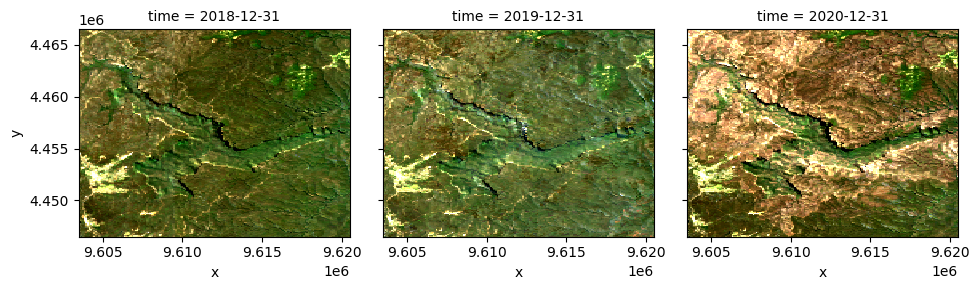

In [30]:
(ds_resample_median[['nbart_red','nbart_green','nbart_blue']]
 .to_dataarray()
 .plot.imshow(col='time', col_wrap=3, robust=True))

## Resample to Quarters
The process above can be repeated to produce quarterly periods simply by replacing `time='Y'` with `time='Q'` in the call to the `.resample()` function. The quarters will cover the months JFM, AMJ, JAS, OND. This can be verified by inspecting the `time` coordinate in the resampled dataset. By choosing `col_wrap=4` in the `.plot()` command each row will represent a calendar year and the columns will represent the same quarter in each year.

In [89]:
# Create a resample object
ds_resample = ds.resample(time='Q')

In [90]:
# Aggregate the resampled dataset along the time dimension using the median
ds_resample_median = ds_resample.median(dim='time')
ds_resample_median

<xarray.Dataset>
Dimensions:      (time: 12, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 3308
  * time         (time) datetime64[ns] 2018-03-31 2018-06-30 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 406.8 367.5 373.2 ... 478.0 540.0 285.0
    nbart_blue   (time, y, x) float32 282.5 243.5 232.8 ... 448.5 568.0 176.0
    nbart_green  (time, y, x) float32 383.5 354.2 347.0 ... 505.5 595.0 285.0
    nbart_nir_1  (time, y, x) float32 1.472e+03 1.656e+03 ... 1.955e+03
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

The plot below visualises the twelve quarters in the three year study period.

C:\Users\mjdea\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


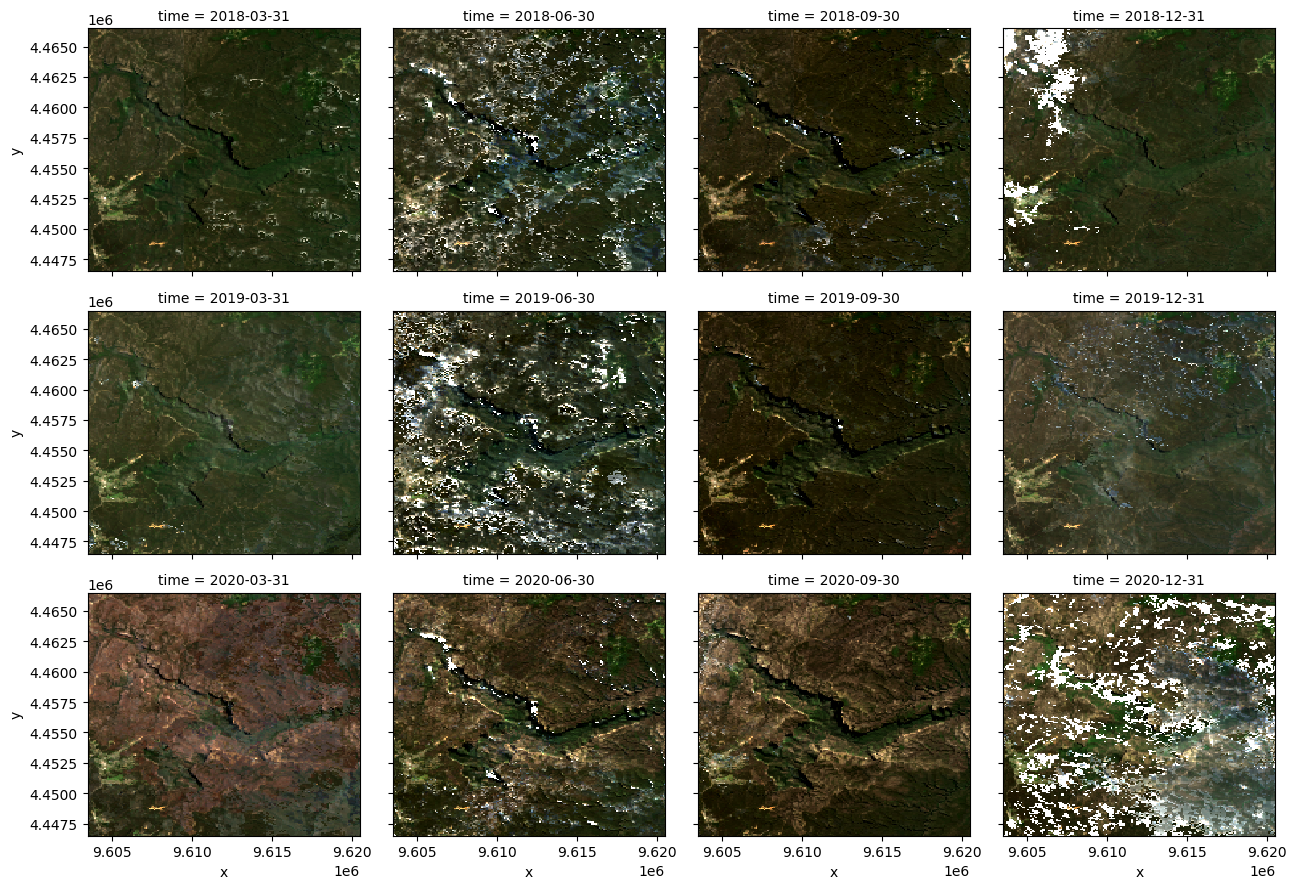

In [91]:
(ds_resample_median[['nbart_red','nbart_green','nbart_blue']]
 .to_dataarray()
 .plot.imshow(col='time', col_wrap=4, robust=True))

## Resample to Season-based Quarters
Depending on the study area it might be more informative to resample to season-based quarters (DJF, MAM, JJA, SON) rather than year-based quarters. This requires passing `time=Q-FEB` to the `.resample()` function, instructing xarray to use quarters that end in February. Notice that the first quarter in the resampled dataset will cover only the first two months since the original dataset begins in January. Similarly, the last quarter in the resampled dataset will cover only the last month of the original dataset and the end of the last quarter will be February of the year after the end of the dataset.

In [92]:
# Create a resample object
ds_resample = ds.resample(time='Q-FEB')

In [93]:
# Aggregate the resampled dataset along the time dimension using the median
ds_resample_median = ds_resample.median(dim='time')
ds_resample_median

<xarray.Dataset>
Dimensions:      (time: 13, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 3308
  * time         (time) datetime64[ns] 2018-02-28 2018-05-31 ... 2021-02-28
Data variables:
    nbart_red    (time, y, x) float32 444.0 398.0 420.0 387.0 ... nan nan nan
    nbart_blue   (time, y, x) float32 316.0 271.0 268.0 244.0 ... nan nan nan
    nbart_green  (time, y, x) float32 414.0 377.0 379.0 347.0 ... nan nan nan
    nbart_nir_1  (time, y, x) float32 1.499e+03 1.689e+03 1.756e+03 ... nan nan
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

The plot below visualises the thirteen quarters in the resampled dataset. The plot from the last quarter of the resampled dataset covers the first two months of the year after the end of the study period, so it can be dropped before plotting by using `.isel(time=slice(None,-1))`. 

C:\Users\mjdea\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cm.py:489: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


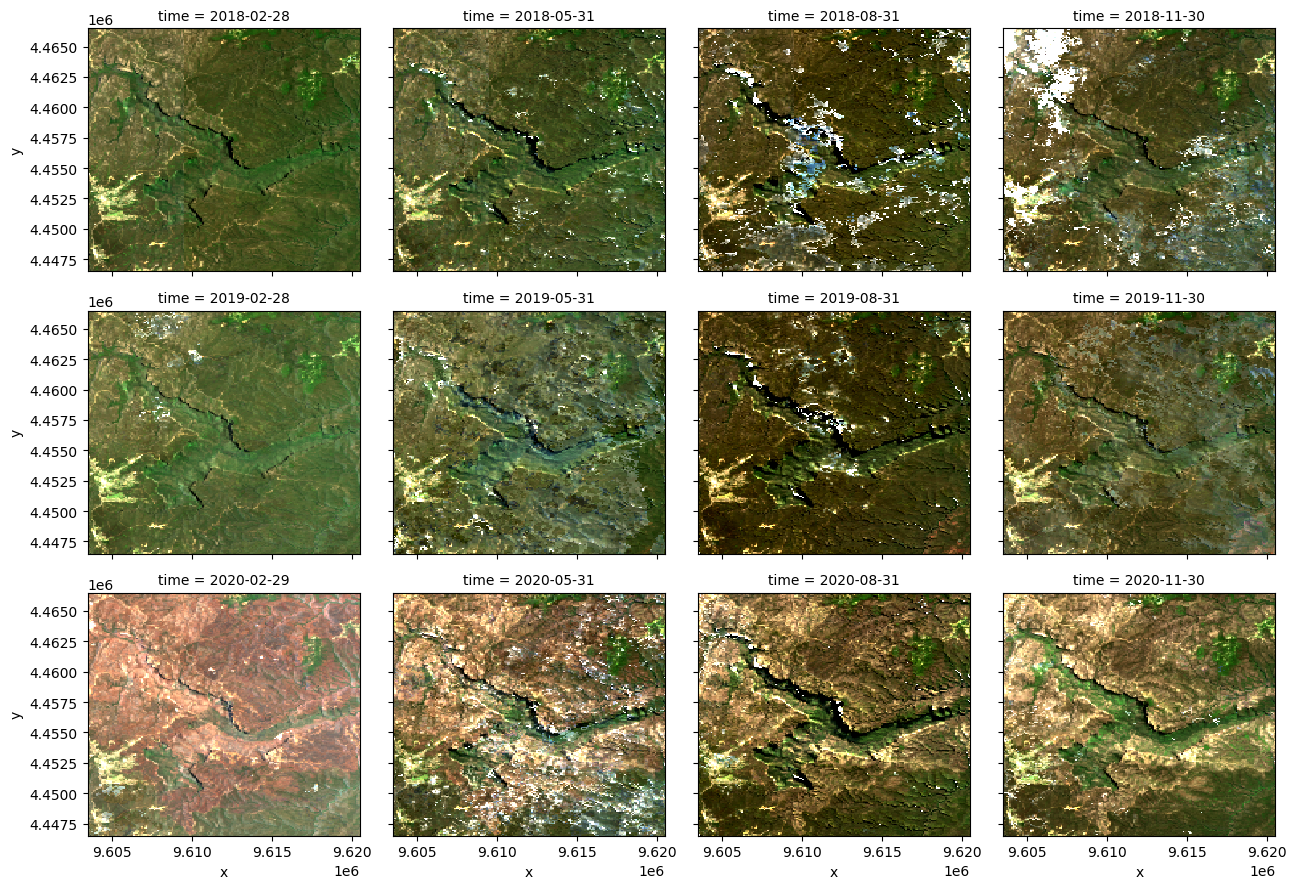

In [94]:
(ds_resample_median[['nbart_red','nbart_green','nbart_blue']]
 .isel(time=slice(None,-1))
 .to_dataarray()
 .plot.imshow(col='time', col_wrap=4, robust=True))

## Resample to a Custom Multiple of Months
An integer preceding the period alias represents resampling to multiples of the period. The following example resamples to half-years by passing `time='6M'` to the `.resample()` function. `'6M'` is interpreted as a period of six months. `'6MS'` indicates that the periods should use the start of the first month. This will avoid overflow into the year following the study period. The same technique can be used for other period aliases. `'10Y'` would represent decades, for example.

In [95]:
# Create a resample object
ds_resample = ds.resample(time='6MS')

In [96]:
# Aggregate the resampled dataset along the time dimension using the median
ds_resample_median = ds_resample.median(dim='time')
ds_resample_median

<xarray.Dataset>
Dimensions:      (time: 6, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 3308
  * time         (time) datetime64[ns] 2018-01-01 2018-07-01 ... 2020-07-01
Data variables:
    nbart_red    (time, y, x) float32 357.5 335.0 325.5 ... 268.0 309.0 272.2
    nbart_blue   (time, y, x) float32 271.2 243.5 232.8 ... 168.5 188.0 159.0
    nbart_green  (time, y, x) float32 354.2 341.2 334.2 ... 253.5 290.0 262.5
    nbart_nir_1  (time, y, x) float32 1.473e+03 1.656e+03 ... 1.89e+03 1.964e+03
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

The plot below visualises the six half-years in the three year study period. Setting `col_wrap=2` makes each row a calendar year, and each column the same half of each year. The parameter setting `size=2.5` reduces the size of the subplots.

*Note*: The dates in the headings of the subplots represent the start of each period.

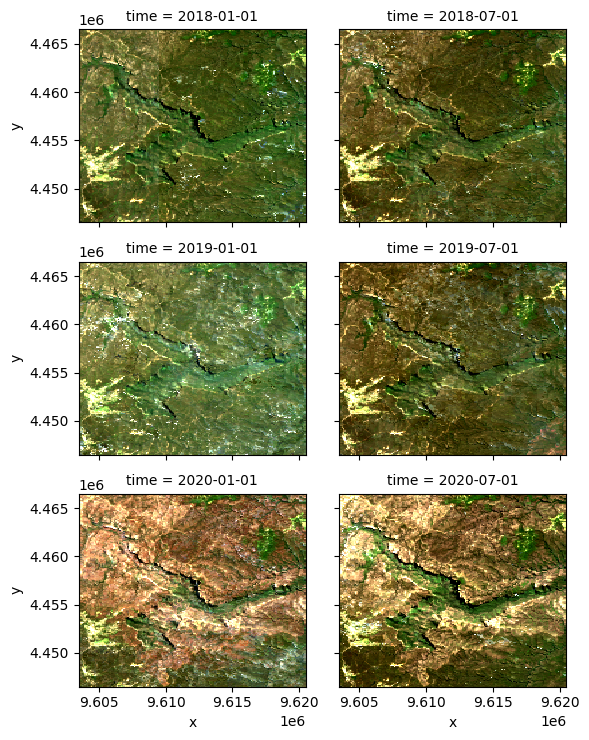

In [98]:
(ds_resample_median[['nbart_red','nbart_green','nbart_blue']]
 .to_dataarray()
 .plot.imshow(col='time', col_wrap=2, size=2.5, robust=True))

## Further Reading
* The period aliases used in Xarray are the same as those in Pandas. See The Period Aliases section of [Time series / date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#period-aliases) in the Pandas documentation for more details.